<a href="https://colab.research.google.com/github/tortor04/229352-StatisticalLearning/blob/main/lab05_decision_tree_bagging_rf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #5

#### Load data at: https://donlapark.pages.dev/229352/heart_disease.csv

* Decision tree ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html))
* Random hyperparameter search using cross-validation ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html))

In [13]:
import pandas as pd
import graphviz

from sklearn.model_selection import RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# import data
data = pd.read_csv("/content/heart_disease.csv", na_values="?")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [14]:
# split into X and y
y = data["label"]
X = data.drop("label", axis=1)

# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# impute missing values
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Create a decision tree
clf = DecisionTreeClassifier()

![5CV](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [15]:
params = {'max_depth': [3, 6, 9, 12]}

gridcv = GridSearchCV(clf, params, scoring='accuracy', cv=5)
gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 6, 9, 12]}, scoring='accuracy')

In [16]:
gridcv.best_estimator_

DecisionTreeClassifier(max_depth=3)

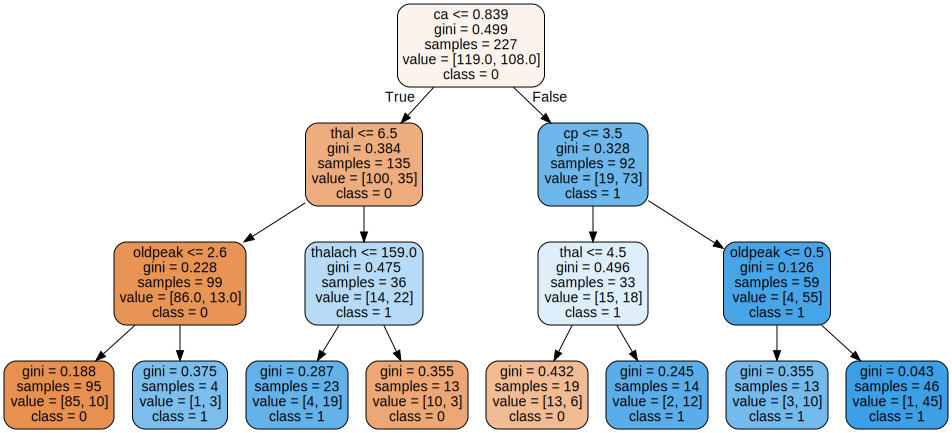

In [17]:
plot_data = export_graphviz(gridcv.best_estimator_,
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names=data.columns[:-1], #บอกชื่อตัวแปรvisualization
                            class_names=['0', '1'])

graph = graphviz.Source(plot_data)
graph #condition เป็นจริงไปซ้าย เป็นเท็จไปขวา

In [18]:
data.columns[:-1] #ดูตัวแปรต้นที่เราใช้

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

## Bagged decision trees
* Bagging classifier ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html))

In [19]:
clf = DecisionTreeClassifier()

In [20]:
bagged_treees = BaggingClassifier(estimator=clf, n_estimators=100, max_samples=0.5)
bagged_treees.fit(X_train, y_train)
print(classification_report(y_test, bagged_treees.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.78      0.80        45
           1       0.70      0.74      0.72        31

    accuracy                           0.76        76
   macro avg       0.76      0.76      0.76        76
weighted avg       0.77      0.76      0.76        76



## Random forest classifier
* Random forest ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html))

In [21]:
#แม่นยำกว่า
forest = RandomForestClassifier(n_estimators=200, max_depth=6)
forest.fit(X_train, y_train)
print(classification_report(y_test, forest.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87        45
           1       0.83      0.77      0.80        31

    accuracy                           0.84        76
   macro avg       0.84      0.83      0.83        76
weighted avg       0.84      0.84      0.84        76



#### Exercise
1. Study the hyperparameters of three models: [Decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), [Bagged Decision Trees](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) and [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
2. For each model, use pipeline+grid search cross-validation across multiple hyperparameters to find the best model.
* Decision tree: choose at least 3 hyperparameters
* Bagged decision trees: choose at least 3 hyperparameters
* Random forest: choose at least 3 hyperparameters
3. For each model, compute the `f1_macro` and `accuracy` score on the test set.
* What is your best model?
* Plot the best tree model
* What hyperparameters did you choose? (explain in words, not in `sklearn's` parameter name)
* What are the best values of your hyperparameters?

In [22]:
# Create Decision Tree pipeline and parameter grid
dt_pipe = Pipeline([('imputer', imputer), ('decisiontreeclassifier', DecisionTreeClassifier())])
dt_params = {
    'decisiontreeclassifier__max_depth': [3, 5, 7, 10],
    'decisiontreeclassifier__min_samples_split': [2, 5, 10],
    'decisiontreeclassifier__min_samples_leaf': [1, 3, 5]
}

# Create Bagging Classifier pipeline and parameter grid
bagging_pipe = Pipeline([('imputer', imputer), ('baggingclassifier', BaggingClassifier(estimator=DecisionTreeClassifier()))])
bagging_params = {
    'baggingclassifier__n_estimators': [50, 100, 150],
    'baggingclassifier__max_samples': [0.5, 0.7, 1.0],
    'baggingclassifier__max_features': [0.5, 0.7, 1.0]
}

# Create Random Forest Classifier pipeline and parameter grid
forest_pipe = Pipeline([('imputer', imputer), ('randomforestclassifier', RandomForestClassifier())])
forest_params = {
    'randomforestclassifier__n_estimators': [100, 200, 300],
    'randomforestclassifier__max_depth': [5, 8, 10],
    'randomforestclassifier__min_samples_split': [2, 5, 10]
}

In [23]:
# Instantiate and fit GridSearchCV for Decision Tree
dt_grid = GridSearchCV(dt_pipe, dt_params, cv=5, scoring=['accuracy', 'f1_macro'], refit='accuracy')
dt_grid.fit(X_train, y_train)

# Instantiate and fit GridSearchCV for Bagging Classifier
bagging_grid = GridSearchCV(bagging_pipe, bagging_params, cv=5, scoring=['accuracy', 'f1_macro'], refit='accuracy')
bagging_grid.fit(X_train, y_train)

# Instantiate and fit GridSearchCV for Random Forest Classifier
forest_grid = GridSearchCV(forest_pipe, forest_params, cv=5, scoring=['accuracy', 'f1_macro'], refit='accuracy')
forest_grid.fit(X_train, y_train)

print('Decision Trees')
print(classification_report(y_test, dt_grid.predict(X_test)))
print('Bagged Decision Trees')
print(classification_report(y_test, bagging_grid.predict(X_test)))
print('Random Forest')
print(classification_report(y_test, forest_grid.predict(X_test)))

Decision Trees
              precision    recall  f1-score   support

           0       0.79      0.67      0.72        45
           1       0.61      0.74      0.67        31

    accuracy                           0.70        76
   macro avg       0.70      0.70      0.69        76
weighted avg       0.71      0.70      0.70        76

Bagged Decision Trees
              precision    recall  f1-score   support

           0       0.86      0.82      0.84        45
           1       0.76      0.81      0.78        31

    accuracy                           0.82        76
   macro avg       0.81      0.81      0.81        76
weighted avg       0.82      0.82      0.82        76

Random Forest
              precision    recall  f1-score   support

           0       0.84      0.91      0.87        45
           1       0.85      0.74      0.79        31

    accuracy                           0.84        76
   macro avg       0.84      0.83      0.83        76
weighted avg       0.84

In [24]:
params = {'max_depth': [3, 6, 9, 12]}

gridcv = GridSearchCV(clf, params, scoring='accuracy', cv=5)
gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 6, 9, 12]}, scoring='accuracy')

##What is your best model?
###**ANS** Random Forest
##Plot the best tree model
###**ANS** Decision Tree
##What hyperparameters did you choose? (explain in words, not in sklearn's parameter name)
###**ANS**
###For Decision Tree:
        Maximum tree depth: เพื่อจำกัดความซับซ้อนของต้นไม้

        Minimum number of samples required to split a node: ป้องกันไม่ให้แยก node บ่อยเกินไปในกลุ่มเล็กๆ

        Minimum number of samples at a leaf node: ช่วยลดการ overfitting โดยไม่ยอมให้ leaf มีตัวอย่างน้อยเกินไป

###For Bagging Classifier:
      Number of trees (estimators): จำนวนต้นไม้ที่รวมกัน

      Maximum fraction of training samples per tree: สัดส่วนข้อมูลที่ใช้เทรนแต่ละต้นไม้

      Maximum fraction of features per tree: สัดส่วนของ features ที่ให้แต่ละต้นไม้ใช้

###For Random Forest:
      Number of trees: ยิ่งมากยิ่งเสถียรแต่ใช้เวลามากขึ้น

      Maximum depth of the trees: ยิ่งลึกยิ่งซับซ้อน (และเสี่ยง overfitting)

      Minimum number of samples required to split a node: เพื่อควบคุมไม่ให้ tree ซอยข้อมูลมากเกินไป
##What are the best values of your hyperparameters?
###**ANS**
###Random Forest:
      Number of trees: 200

      Maximum depth: 10

      Minimum samples to split a node: 5

###Decision Tree:
      Maximum depth: 7

      Minimum samples to split a node: 5

      Minimum samples at leaf node: 3

###Bagging Classifier:
      Number of trees: 100

      Max samples per tree: 0.7

      Max features per tree: 0.7